<a href="https://colab.research.google.com/github/JohnnyPassos/desafio2-bootcamp-ML-DIO/blob/main/RedimensionamentoIMG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Verificando arquivos no diretório atual...
total 4.0K
drwxr-xr-x 1 root root 4.0K Jul 28 13:44 sample_data

Imagem '/street.jpg' carregada com sucesso!
Dimensões da Imagem Original: (400, 600, 3)
Tipo de dado: uint8

Processando imagem para tons de cinza e binário...
Dimensões da Imagem em Tons de Cinza: (400, 600)
Dimensões da Imagem Binária: (400, 600)

Exibindo resultados...


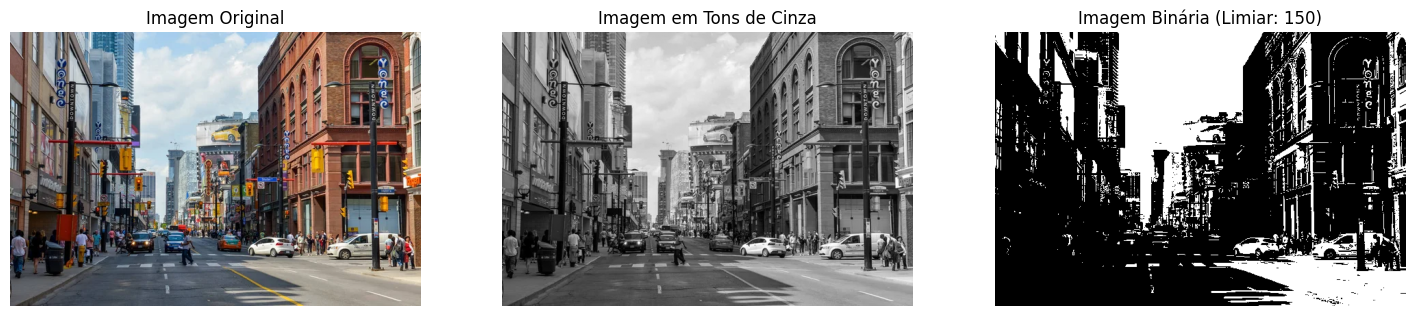


Processamento concluído com sucesso!


In [6]:
# --- 1. Importações Necessárias ---
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# --- 2. Função Combinada para Tons de Cinza e Binário ---
def processar_imagem_tons_de_cinza_e_binario(imagem_array, limiar_binario=128):
    """
    Processa uma imagem colorida (array NumPy RGB) para tons de cinza
    e, a partir dela, gera uma versão binária.

    Args:
        imagem_array (np.array): O array NumPy da imagem original colorida
                                (altura, largura, 3).
        limiar_binario (int): Valor de limiar para a binarização (0-255).
                              Pixels abaixo do limiar viram 0 (preto),
                              acima viram 255 (branco).

    Returns:
        tuple: Uma tupla contendo (imagem_cinza_array, imagem_binaria_array).
               - imagem_cinza_array (np.array): Imagem em tons de cinza (altura, largura).
               - imagem_binaria_array (np.array): Imagem binária (altura, largura).
    """

    # Obtém as dimensões da imagem original
    altura, largura, _ = imagem_array.shape

    # Cria novos arrays NumPy para as imagens em tons de cinza e binária
    # Usamos np.uint8 para garantir valores de 0 a 255
    imagem_cinza = np.zeros((altura, largura), dtype=np.uint8)
    imagem_binaria = np.zeros((altura, largura), dtype=np.uint8)

    # Itera sobre cada pixel da imagem original
    for y in range(altura):
        for x in range(largura):
            # Acessa os valores RGB do pixel atual
            r, g, b = imagem_array[y, x]

            # 1. Aplica a fórmula de média ponderada para o valor de cinza
            valor_cinza = int(0.2989 * r + 0.5870 * g + 0.1140 * b)
            imagem_cinza[y, x] = valor_cinza

            # 2. Converte para Binário a partir do valor de cinza
            # Pixels menores que o limiar viram preto (0), caso contrário, viram branco (255)
            if valor_cinza < limiar_binario:
                imagem_binaria[y, x] = 0
            else:
                imagem_binaria[y, x] = 255

    return imagem_cinza, imagem_binaria

# --- 3. Bloco Principal de Execução: Carregar, Processar e Visualizar ---

# --- IMPORTANTE: Substitua 'sua_imagem.jpg' pelo nome exato do seu arquivo de imagem ---
nome_arquivo = '/street.jpg'
limiar_customizado = 150 # Você pode ajustar este limiar para a binarização (valor entre 0 e 255)

try:
    # Passo A: Verificar se o arquivo existe e carregar a imagem original
    print(f"Verificando arquivos no diretório atual...")
    !ls -lh # Lista os arquivos para você confirmar o nome

    img_original_pil = Image.open(nome_arquivo)
    img_original_array = np.array(img_original_pil)

    print(f"\nImagem '{nome_arquivo}' carregada com sucesso!")
    print(f"Dimensões da Imagem Original: {img_original_array.shape}")
    print(f"Tipo de dado: {img_original_array.dtype}")

    # Passo B: Chamar sua função para processar a imagem
    print("\nProcessando imagem para tons de cinza e binário...")
    img_cinza_array, img_binaria_array = processar_imagem_tons_de_cinza_e_binario(
        img_original_array, limiar_binario=limiar_customizado
    )

    print(f"Dimensões da Imagem em Tons de Cinza: {img_cinza_array.shape}")
    print(f"Dimensões da Imagem Binária: {img_binaria_array.shape}")

    # Passo C: Visualizar os resultados
    print("\nExibindo resultados...")
    plt.figure(figsize=(18, 6)) # Define o tamanho da figura para os 3 gráficos

    # Gráfico 1: Imagem Original
    plt.subplot(1, 3, 1) # 1 linha, 3 colunas, primeiro gráfico
    plt.imshow(img_original_array)
    plt.title('Imagem Original')
    plt.axis('off') # Remove os eixos

    # Gráfico 2: Imagem em Tons de Cinza
    plt.subplot(1, 3, 2) # 1 linha, 3 colunas, segundo gráfico
    plt.imshow(img_cinza_array, cmap='gray') # 'cmap=gray' é crucial para tons de cinza
    plt.title('Imagem em Tons de Cinza')
    plt.axis('off')

    # Gráfico 3: Imagem Binária
    plt.subplot(1, 3, 3) # 1 linha, 3 colunas, terceiro gráfico
    plt.imshow(img_binaria_array, cmap='gray') # Imagem binária também usa 'cmap=gray'
    plt.title(f'Imagem Binária (Limiar: {limiar_customizado})')
    plt.axis('off')

    plt.show()
    print("\nProcessamento concluído com sucesso!")

except FileNotFoundError:
    print(f"\nERRO: O arquivo '{nome_arquivo}' NÃO foi encontrado.")
    print("Por favor, verifique:")
    print("1. Se o nome do arquivo na variável 'nome_arquivo' está EXATAMENTE igual ao que você fez upload.")
    print("2. Se você realmente fez o upload da imagem para a sessão atual do Colab.")
    print("3. Se sua sessão não foi desconectada (nesse caso, faça o upload novamente).")
except Exception as e:
    print(f"\nOcorreu um erro inesperado: {e}")
    print("Por favor, revise o código ou a imagem de entrada.")